<a href="https://colab.research.google.com/github/niszhak/Battery-life-prediction-using-ML/blob/main/Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Battery_RUL.csv to Battery_RUL.csv


Sample data:
    Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500

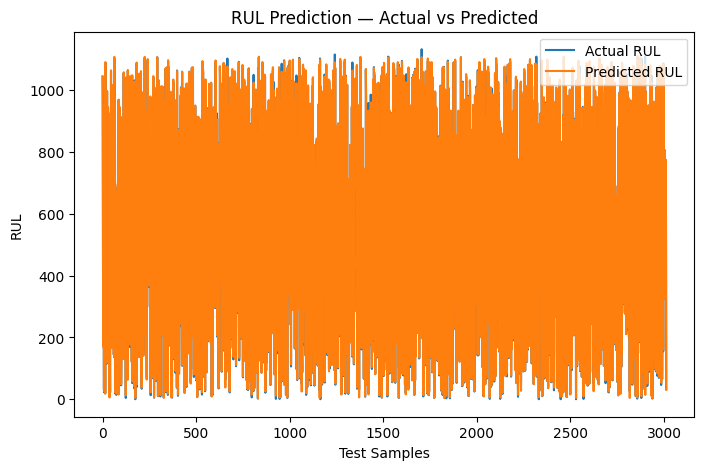

In [ ]:
# Make sure you mount Kaggle or manually upload the CSV into Colab
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Replace with your CSV path
df = pd.read_csv("Battery_RUL.csv") # ensure it matches your upload name

print("Sample data:\n", df.head())

# Adjust these columns if named differently in your CSV
features = [col for col in df.columns if 'cycle' in col.lower() or 'capacity' in col.lower()]
target = 'RUL' if 'RUL' in df.columns else df.columns[-1]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (cycles or units): {mae:.2f}")

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual RUL")
plt.plot(y_pred, label="Predicted RUL")
plt.xlabel("Test Samples")
plt.ylabel("RUL")
plt.legend()
plt.title("RUL Prediction — Actual vs Predicted")
plt.show()


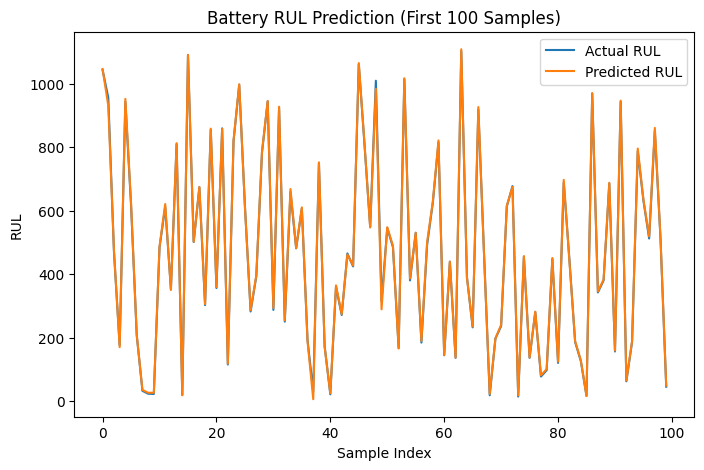

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:100], label="Actual RUL")
plt.plot(y_pred[:100], label="Predicted RUL")
plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.legend()
plt.title("Battery RUL Prediction (First 100 Samples)")
plt.show()


MAE: 2.10
R² : 1.000


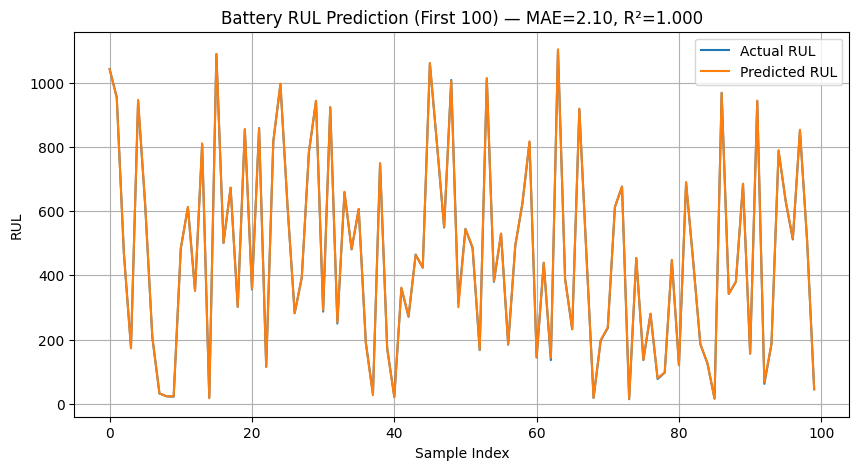

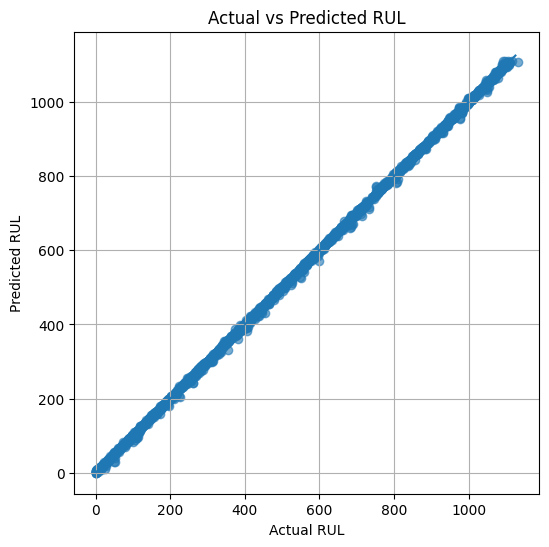

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# --- load your CSV ---
CSV_PATH = "/content/Battery_RUL.csv"   # <- change if needed
df = pd.read_csv(CSV_PATH)

# --- keep numeric, drop NaNs in target ---
df_num = df.apply(pd.to_numeric, errors='coerce')
df_num = df_num.dropna(subset=['RUL'])

# --- features/target ---
X = df_num.drop(columns=['RUL'])
y = df_num['RUL']

# --- split, train, predict ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- metrics ---
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R² : {r2:.3f}")

# --- plot first 100 samples ---
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual RUL")
plt.plot(y_pred[:100], label="Predicted RUL")
plt.xlabel("Sample Index"); plt.ylabel("RUL")
plt.title(f"Battery RUL Prediction (First 100) — MAE={mae:.2f}, R²={r2:.3f}")
plt.legend(); plt.grid(True); plt.show()

# --- scatter: actual vs predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min()); mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], linestyle="--")
plt.xlabel("Actual RUL"); plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
plt.grid(True); plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Battery_RUL.csv")

# Features (X) and Target (y)
X = df.drop(columns=["RUL"])
y = df["RUL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Example: Predict for first test sample
print("Example prediction:", model.predict([X_test.iloc[0]])[0])


Mean Absolute Error: 2.12
R² Score: 0.9999
Example prediction: 1042.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Dataset Preview:
   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10

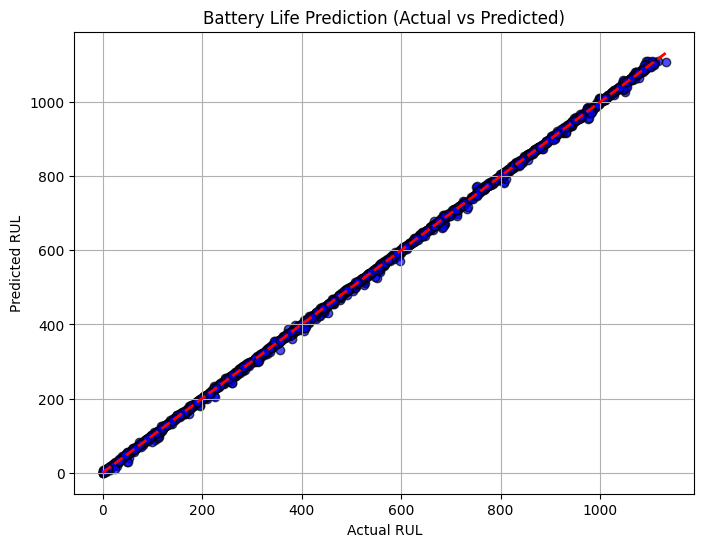

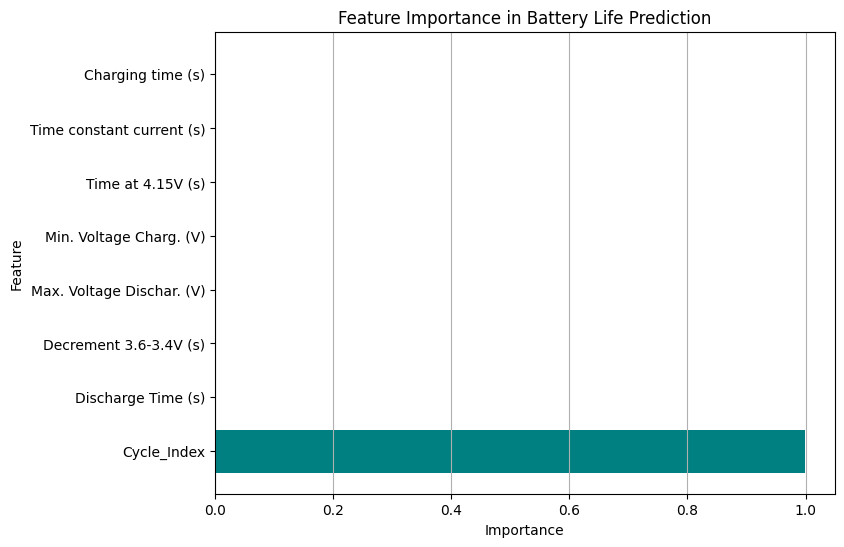

In [ ]:
# Battery Life Prediction using Machine Learning
# Author: Your Name
# Date: 2025-08-15

# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# -------------------------
# 2. Load Dataset
# -------------------------
# Make sure Battery_RUL.csv is in the same folder
data = pd.read_csv("Battery_RUL.csv")

print("Dataset Preview:")
print(data.head(), "\n")

# -------------------------
# 3. Split Features & Target
# -------------------------
# Replace 'RUL' with the exact column name for Remaining Useful Life in your CSV
X = data.drop(columns=["RUL"])
y = data["RUL"]

# -------------------------
# 4. Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 5. Train the Model
# -------------------------
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -------------------------
# 6. Predictions & Evaluation
# -------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Example single prediction (no warning)
example_prediction = model.predict(X_test.iloc[[0]])[0]
print(f"Example Prediction for first test sample: {example_prediction:.2f}")

# -------------------------
# 7. Visualization
# -------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Battery Life Prediction (Actual vs Predicted)")
plt.grid(True)
plt.show()

# -------------------------
# 8. Feature Importance Plot
# -------------------------
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Battery Life Prediction")
plt.grid(axis='x')
plt.show()
